## Data Setup

In [ ]:
#Use if importing from UCI

!pip install ucimlrepo


# IF using directly from UCI, however importing this way drops the subject ID
from ucimlrepo import fetch_ucirepo

# fetch dataset
parkinsons_telemonitoring = fetch_ucirepo(id=189)

# data (as pandas dataframes)
X = parkinsons_telemonitoring.data.features
y = parkinsons_telemonitoring.data.targets

# groups = X['subject#']


# metadata
print(parkinsons_telemonitoring.metadata)

# variable information
print(parkinsons_telemonitoring.variables)



{'uci_id': 189, 'name': 'Parkinsons Telemonitoring', 'repository_url': 'https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring', 'data_url': 'https://archive.ics.uci.edu/static/public/189/data.csv', 'abstract': "Oxford Parkinson's Disease Telemonitoring Dataset", 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 5875, 'num_features': 19, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['motor_UPDRS', 'total_UPDRS'], 'index_col': ['subject#'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5ZS3N', 'creators': ['Athanasios Tsanas', 'Max Little'], 'intro_paper': {'ID': 229, 'type': 'NATIVE', 'title': "Accurate Telemonitoring of Parkinson's Disease Progression by Noninvasive Speech Tests", 'authors': 'A. Tsanas, Max A. Little, P. McSharry, L. Ramig', 'venue': 'IEEE Transactions on Bio

In [ ]:
X.head()

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex
0,72,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0
1,72,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0
2,72,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,0
3,72,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,0
4,72,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,0


In [ ]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#Run if using file directly and you want to preserve splitting by specific patient!

df = pd.read_csv("parkinsons_updrs_data.csv")
df.head()

#Separate features and target

X = df.drop(columns=['motor_UPDRS', 'total_UPDRS'])
y = df['total_UPDRS']
groups = X['subject#']

X.head()
y.head()
X['subject#'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

## Data Exploration

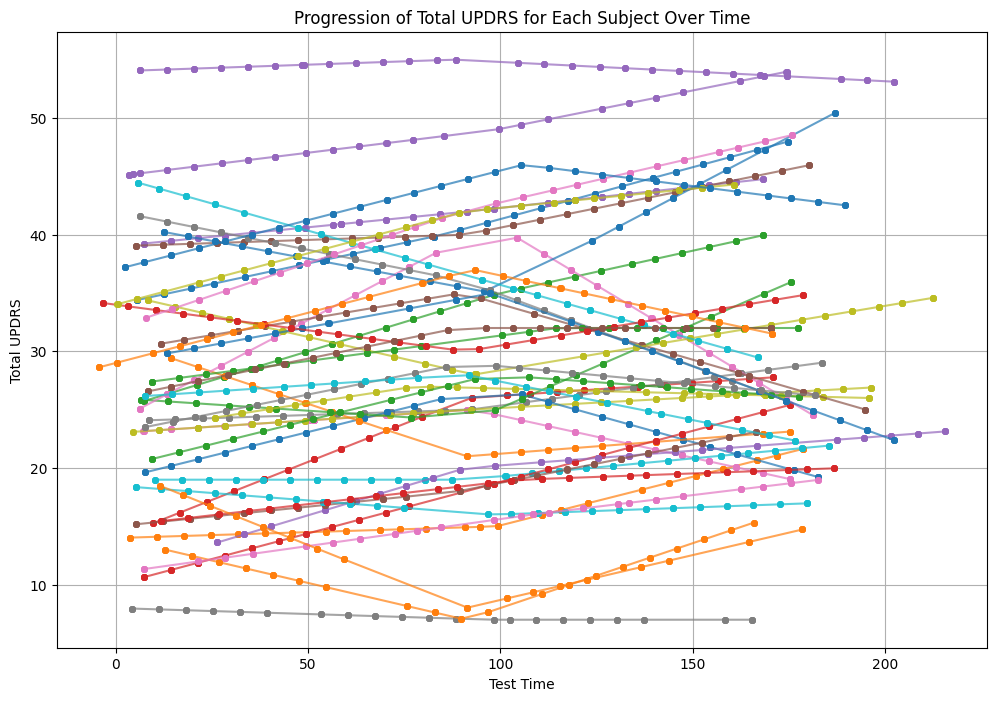

In [ ]:
from re import sub
plt.figure(figsize=(12, 8))
for subject_id in df['subject#'].unique():
    subject_df = df[df['subject#'] == subject_id]
    sorted_indices = np.argsort(subject_df['test_time'])
    x_sort = subject_df['test_time'].values[sorted_indices]
    y_sort = subject_df['total_UPDRS'].values[sorted_indices]
    plt.plot(x_sort, y_sort, label=f'Subject {subject_id}', alpha=0.7, marker='o', markersize=4)

plt.xlabel('Test Time')
plt.ylabel('Total UPDRS')
plt.title('Progression of Total UPDRS for Each Subject Over Time')
# To avoid cluttering, we won't show the legend if there are too many subjects
# if len(df['subject#'].unique()) <= 10:
#     plt.legend()
plt.grid(True)
plt.show()

In [ ]:
subject_correlations = pd.DataFrame()
print("Empty DataFrame 'subject_correlations' created.")

Empty DataFrame 'subject_correlations' created.


In [ ]:
unique_subjects = df['subject#'].unique()
for subject_id in unique_subjects:
    subject_df = df[df['subject#'] == subject_id]

    # Define feature columns by excluding identifiers and target variables
    feature_cols = [col for col in subject_df.columns if col not in ['subject#', 'motor_UPDRS', 'total_UPDRS']]

    # Calculate correlations for the current subject
    correlations = {}
    for feature in feature_cols:
        # Ensure there is enough data to calculate correlation (at least 2 non-NaN values)
        if subject_df[feature].count() > 1 and subject_df['total_UPDRS'].count() > 1:
            # Pearson correlation ignores NaN values by default
            correlation_value = subject_df[feature].corr(subject_df['total_UPDRS'])
            correlations[feature] = correlation_value
        else:
            correlations[feature] = np.nan # Assign NaN if correlation cannot be computed

    # Add correlations for the current subject to the main DataFrame
    subject_correlations = pd.concat([subject_correlations, pd.DataFrame([correlations], index=[subject_id])])

print("Subject-wise correlations calculated and stored in 'subject_correlations'.")
print(subject_correlations.head())

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Subject-wise correlations calculated and stored in 'subject_correlations'.
   age  sex  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
1  NaN  NaN   0.998394  -0.069550    -0.020387   -0.047879    -0.029760   
2  NaN  NaN   0.916451   0.013348     0.010005   -0.034241    -0.033569   
3  NaN  NaN   0.997231  -0.166863    -0.077857   -0.169394    -0.217030   
4  NaN  NaN   0.949654   0.026415     0.032657   -0.028148    -0.006547   
5  NaN  NaN   0.999674   0.152829     0.127234    0.165002     0.104903   

   Jitter:DDP   Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
1   -0.048037  0.131470     0.109142      0.128722      0.111209   
2   -0.034231 -0.184857    -0.135266     -0.201267     -0.193458   
3   -0.169389 -0.264183    -0.254096     -0.253881     -0.244505   
4   -0.028269 -0.190322    -0.206187     -0.184105     -0.213858   
5    0.165119 -0.089704     0.001306     -0.073240     -0.092148   

   Shimmer:APQ11  Shimmer:DDA       NHR       HNR      RPDE      

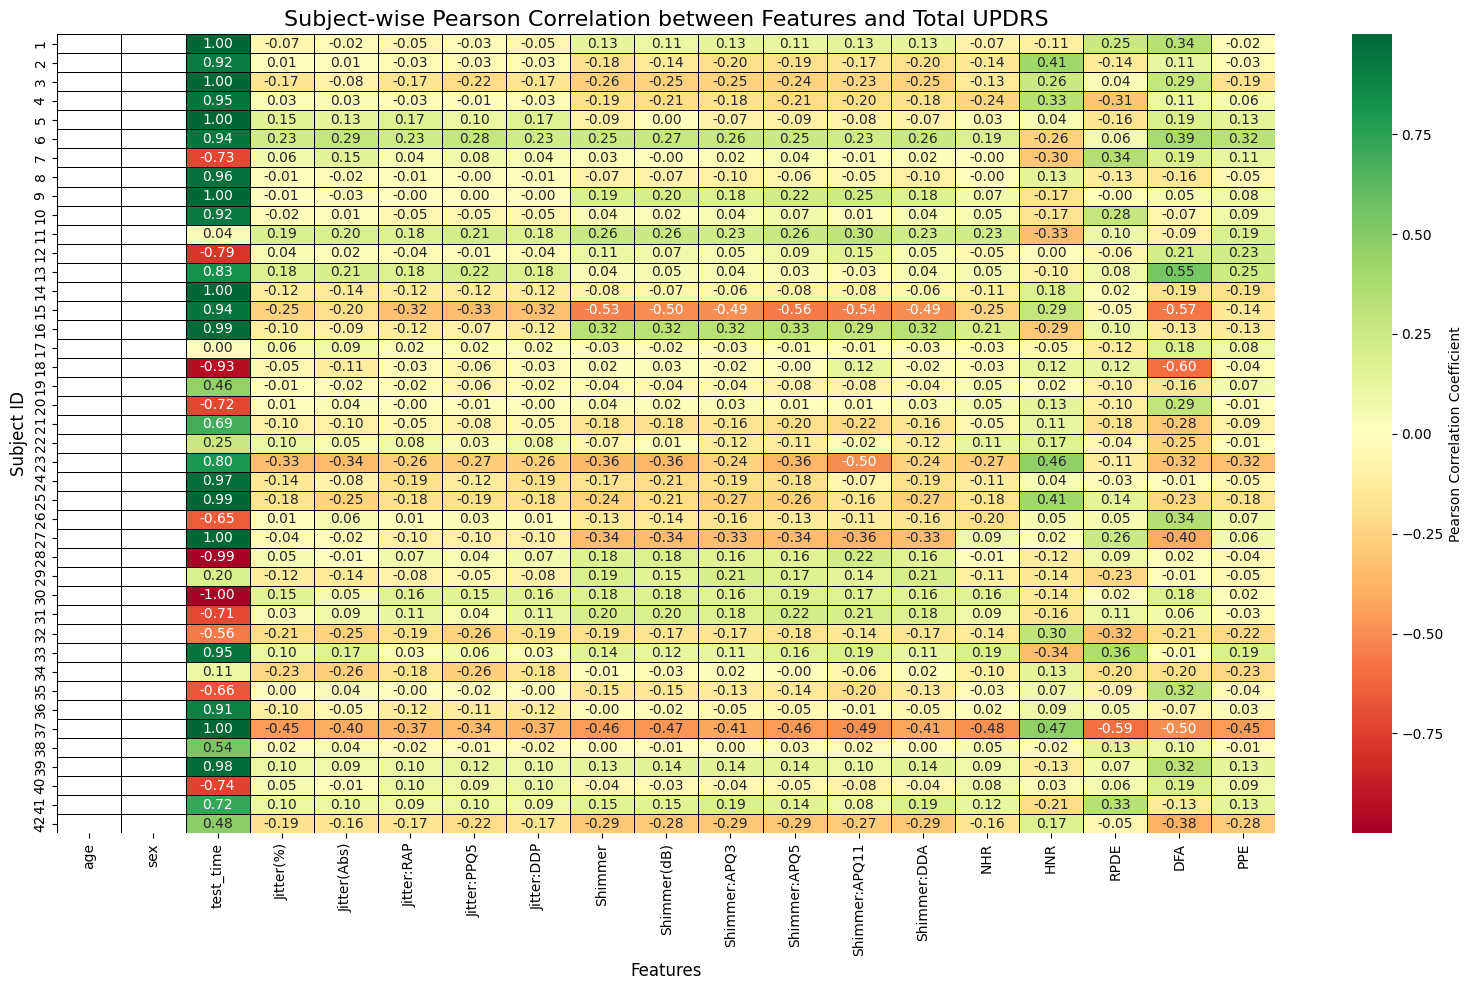

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
sns.heatmap(
    subject_correlations,
    annot=True,
    cmap='RdYlGn', # Diverging colormap: Red for negative, Green for positive
    fmt=".2f", # Format annotations to 2 decimal places
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Pearson Correlation Coefficient'}
)
plt.title('Subject-wise Pearson Correlation between Features and Total UPDRS', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Subject ID', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import linregress

# Initialize an empty list to store results
slopes_data = []

# Iterate through each unique subject ID
for subject_id in unique_subjects:
    subject_df = df[df['subject#'] == subject_id]

    # Check if there are enough data points (at least 2) for linear regression
    if len(subject_df) >= 2:
        x = subject_df['test_time']
        y = subject_df['total_UPDRS']

        # Perform linear regression
        # linregress returns slope, intercept, r_value, p_value, stderr
        # Handle cases where x or y might be constant, leading to NaN slope
        if x.std() == 0 or y.std() == 0:
            slope = np.nan
        else:
            slope, intercept, r_value, p_value, stderr = linregress(x, y)
    else:
        slope = np.nan # Not enough data points to calculate slope

    slopes_data.append({'subject#': subject_id, 'slope': slope})

# Convert the collected data into a Pandas DataFrame
subject_slopes_df = pd.DataFrame(slopes_data)
subject_slopes_df_sorted = subject_slopes_df.sort_values(by='slope', ascending=False)


print("Subject-wise linear regression slopes calculated.")
print(subject_slopes_df_sorted.head())


Subject-wise linear regression slopes calculated.
    subject#     slope
36        37  0.092432
2          3  0.089205
13        14  0.087913
0          1  0.080422
3          4  0.077662


Full correlation matrix calculated:


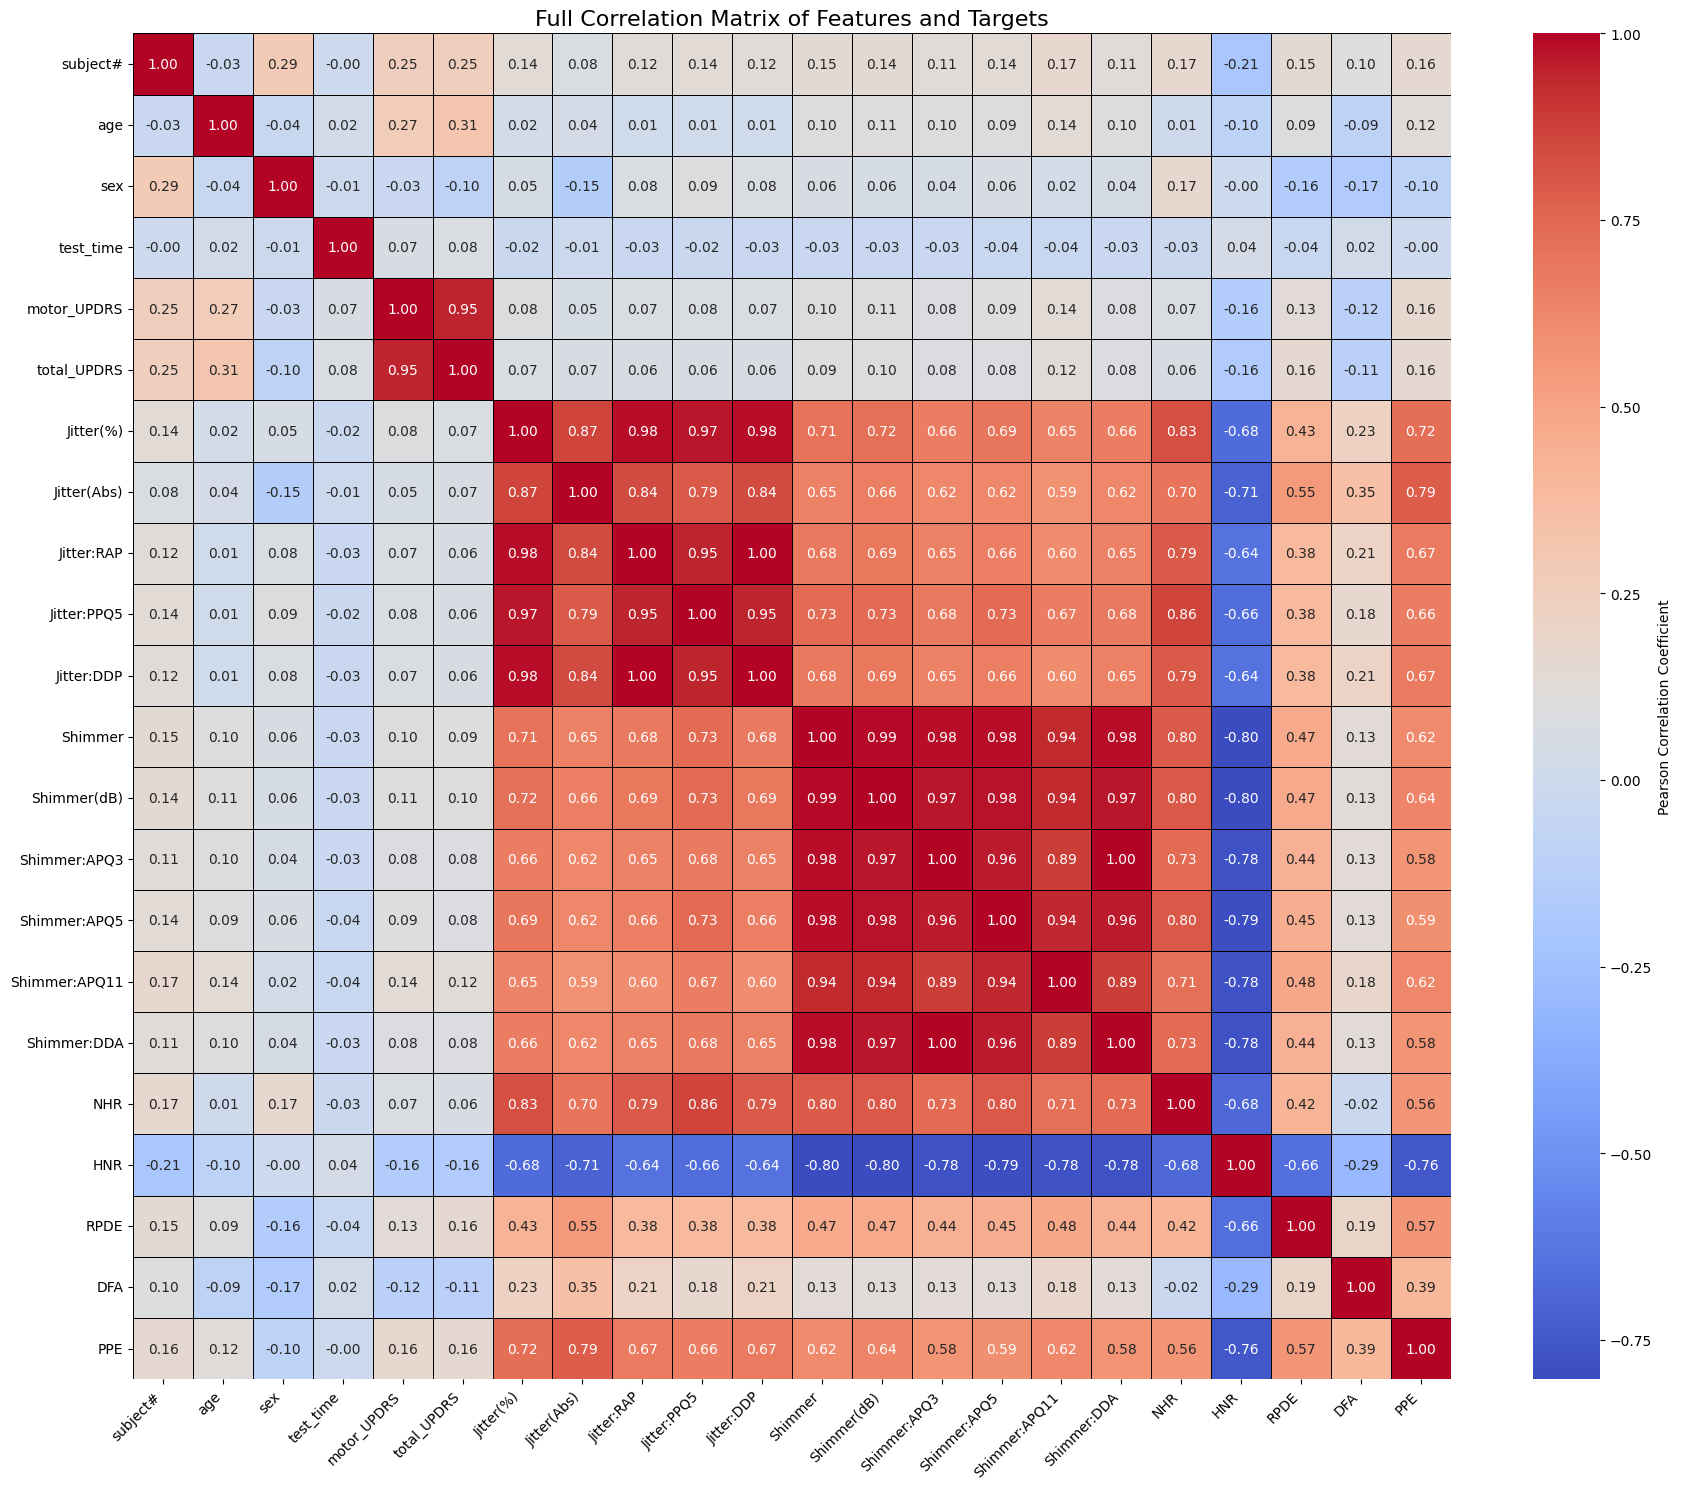

Heatmap of the full correlation matrix displayed.


In [ ]:
full_correlation_matrix = df.corr()
print("Full correlation matrix calculated:")
full_correlation_matrix.head()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15)) # Adjust figure size for better readability
sns.heatmap(
    full_correlation_matrix,
    annot=True,
    cmap='coolwarm', # A diverging colormap to highlight positive/negative correlations
    fmt=".2f", # Format annotations to 2 decimal places
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Pearson Correlation Coefficient'}
)
plt.title('Full Correlation Matrix of Features and Targets', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(rotation=0) # Ensure y-axis labels are horizontal
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
print("Heatmap of the full correlation matrix displayed.")

## Models

### Subject-based train-test split

In [ ]:
#USE IF PERFORMING SUBJECT BASED TRAIN TEST SPLIT

# Perform split, however per Sergio because we have multiple samples from single patient, split should ensure all
# So when you split your data ensure all data from a given patient (subject ID) ends up in the same split.
# Otherwise, memory leak could end up inflating your performance.
# Means we cannot do simple train/test/split, wil need to do GroupShuffle to remove test set, and GroupKFold for validation/K fold testing

from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold

#One 80/20 split, maintaining subject ID in same group
group_splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=1)

#Generate split indices and split the groups
train_indices, test_indices = next(group_splitter.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

groups_train = groups.iloc[train_indices]
groups_test = groups.iloc[test_indices]

In [ ]:
#Check if groups are split correctly
if any(item in train_indices for item in test_indices):
    print("INDICES OVERLAP")
else:
    print("Groups successfully split")

Groups successfully split


### Normal train-test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Baseline Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

linR = LinearRegression()
lin_reg_cv_scores = cross_val_score(linR, X_train, y_train, cv=5)
lin_reg_cv_scores_rmse = cross_val_score(linR, X=X_train, y=y_train, cv=5, scoring='neg_root_mean_squared_error')
lin_reg_cv_scores_mae = cross_val_score(linR, X=X_train, y=y_train, cv=5, scoring='neg_mean_absolute_error')

print("Mean CV R² with Linear Regression:", np.mean(lin_reg_cv_scores).round(3))
print("Mean CV RMSE with Linear Regression:", np.mean(lin_reg_cv_scores_rmse*-1).round(3))
print("Mean CV MAE with Linear Regression:", np.mean(lin_reg_cv_scores_mae*-1).round(3))


"""
Mean CV R² with Linear Regression: 0.245
Mean CV RMSE with Linear Regression: 9.265
Mean CV MAE with Linear Regression: 7.6
"""

Mean CV R² with Linear Regression: 0.245
Mean CV RMSE with Linear Regression: 9.265
Mean CV MAE with Linear Regression: 7.6


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean R2 for Linear Regression on Test Set:", r2)
print("Mean RMSE for Linear Regression on Test Set:", rmse)
print("Mean MAE for Linear Regression on Test Set:", mae)

"""
Mean R2 for Linear Regression on Test Set: -1.3856938642408907
Mean RMSE for Linear Regression on Test Set: 214.40008323711814
Mean MAE for Linear Regression on Test Set: 13.03323803943293
"""


Mean R2 for Linear Regression on Test Set: -1.3856938642408907
Mean RMSE for Linear Regression on Test Set: 214.40008323711814
Mean MAE for Linear Regression on Test Set: 13.03323803943293


## Decision Trees and Random Forest

In [ ]:
#DT Imports
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
dt = DecisionTreeRegressor(random_state=1)

cv_scores = cross_val_score(dt, X=X_train, y=y_train, cv=5, scoring='r2')
cv_scores_rmse = cross_val_score(dt, X=X_train, y=y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_scores_mae = cross_val_score(dt, X=X_train, y=y_train, cv=5, scoring='neg_mean_absolute_error')

print("Mean CV R² with Regular Decision Tree:", np.mean(cv_scores).round(3))
print("Mean CV RMSE with Regular Decision Tree:", np.mean(cv_scores_rmse*-1).round(3))
print("Mean CV MAE with Regular Decision Tree:", np.mean(cv_scores_mae*-1).round(3))

"""
Results
Mean CV R² with Regular Decision Tree: 0.927
Mean CV RMSE with Regular Decision Tree: 2.507
Mean CV MAE with Regular Decision Tree: 0.617

"""

In [ ]:
#Fit full model on training data

dt.fit(X_train, y_train)

# predict on test set
y_pred = dt.predict(X_test)

#Test metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean R2 for Decision Tree on Test Set:", r2)
print("Mean RMSE for Decision Tree on Test Set:", rmse)
print("Mean MAE for Decision Tree on Test Set:", mae)

"""
Results
Mean R2 for Decision Tree on Test Set: 0.9587397088818028
Mean RMSE for Decision Tree on Test Set: 3.683371331459577
Mean MAE for Decision Tree on Test Set: 0.3864165531914888
"""


Now Run Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=1, n_jobs=-1)

#Cross Val

cv_r2 = cross_val_score(rf, X=X_train, y=y_train, cv=5, scoring='r2')
cv_scores_rmse = cross_val_score(rf, X=X_train, y=y_train, cv=5, scoring='neg_root_mean_squared_error')
cv_scores_mae = cross_val_score(rf, X=X_train, y=y_train, cv=5, scoring='neg_mean_absolute_error')

print("Mean CV R² with Regular Decision Tree:", np.mean(cv_scores).round(3))
print("Mean CV RMSE with Regular Decision Tree:", np.mean(cv_scores_rmse*-1).round(3))
print("Mean CV MAE with Regular Decision Tree:", np.mean(cv_scores_mae*-1).round(3))

"""
Results
Mean CV R² with Regular Decision Tree: 0.927
Mean CV RMSE with Regular Decision Tree: 1.723
Mean CV MAE with Regular Decision Tree: 0.793
"""

In [ ]:
#Fit Full Model on Training Data

rf.fit(X_train, y_train)

# predict on test set
y_pred_rf = rf.predict(X_test)

#Test metrics
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)


"""
Results
Mean R2 for Decision Tree on Test Set: 0.9791571295563141
Mean RMSE for Decision Tree on Test Set: 1.8648996614401483
Mean MAE for Decision Tree on Test Set: 0.5651082910638316
"""

In [ ]:
print("Mean R2 for Random Forest on Test Set:", r2_rf)
print("Mean RMSE for Random Forest on Test Set:", rmse_rf)
print("Mean MAE for Random Forest on Test Set:", mae_rf)

Decision Tree and Random Forest Analysis with Patient Grouping


In [ ]:
#Using this method to make sure same subject ID in each cross val group
cv = GroupKFold(n_splits=5)

Decision_Tree = DecisionTreeRegressor(random_state=1)

cv_scores = cross_val_score(Decision_Tree, X=X_train, y=y_train, cv=cv, groups=groups_train, scoring='r2')
cv_scores_mae = cross_val_score(Decision_Tree, X=X_train, y=y_train, cv=cv, scoring='neg_mean_absolute_error')
cv_scores_rmse = cross_val_score(Decision_Tree, X=X_train, y=y_train, cv=cv, groups=groups_train, scoring='neg_root_mean_squared_error')


print("Mean CV R² with Regular Decision Tree:", np.mean(cv_scores).round(3))
print("Mean CV RMSE with Regular Decision Tree:", np.mean(cv_scores_rmse).round(3))

ValueError: The 'groups' parameter should not be None.

In [ ]:
#Try Random Forest Before Grid Search

from sklearn.ensemble import RandomForestRegressor

rf_initial = RandomForestRegressor(random_state=1)

cv_rf_initial = cross_val_score(rf_initial, X=X_train, y=y_train, cv=cv, groups=groups_train, scoring='r2')

print("Mean CV R² with RF initial:", np.mean(cv_rf_initial).round(3))

In [ ]:
#Try Grid Search for RF
#Can make this more complex as needed

from sklearn.model_selection import GridSearchCV

rf_grid = RandomForestRegressor(random_state=1)

rf_grid_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(rf_grid, rf_grid_params, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)
#Grid Search Results {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
best_params = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
best_rf = RandomForestRegressor(**best_params, random_state=1)

best_rf.fit(X_train, y_train)

# predict on test set
y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² on test set: {r2:.3f}")
print(f"RMSE on test set: {rmse:.3f}")

In [ ]:
# To assess disease progression
# Per the original article, there are 42 patients
# Each patient was evaluated at baseline, 3 months, and 6 months via motor and total UPDRS
# so we can calculate the difference from baseline to determine progression and try to predict this via regression
groups.unique()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import math
gbr = GradientBoostingRegressor(
    n_estimators=200,      # Number of boosting stages
    learning_rate=0.1,     # Step size shrinkage
    loss='squared_error',  # Default loss function for regression
    random_state=1
)
gbr.fit(X_train, y_train)

# predict on test set
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# 4. Calculate R-squared (R^2)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

Mean Squared Error (MSE): 15.0165
Root Mean Squared Error (RMSE): 3.8751
Mean Absolute Error (MAE): 2.8481
R-squared (R^2): 0.8613
